In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


In [11]:
# Load dataset
file_path = "ObesityDataSet_raw_and_data_sinthetic.csv"
df = pd.read_csv(file_path)

In [13]:
# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [15]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


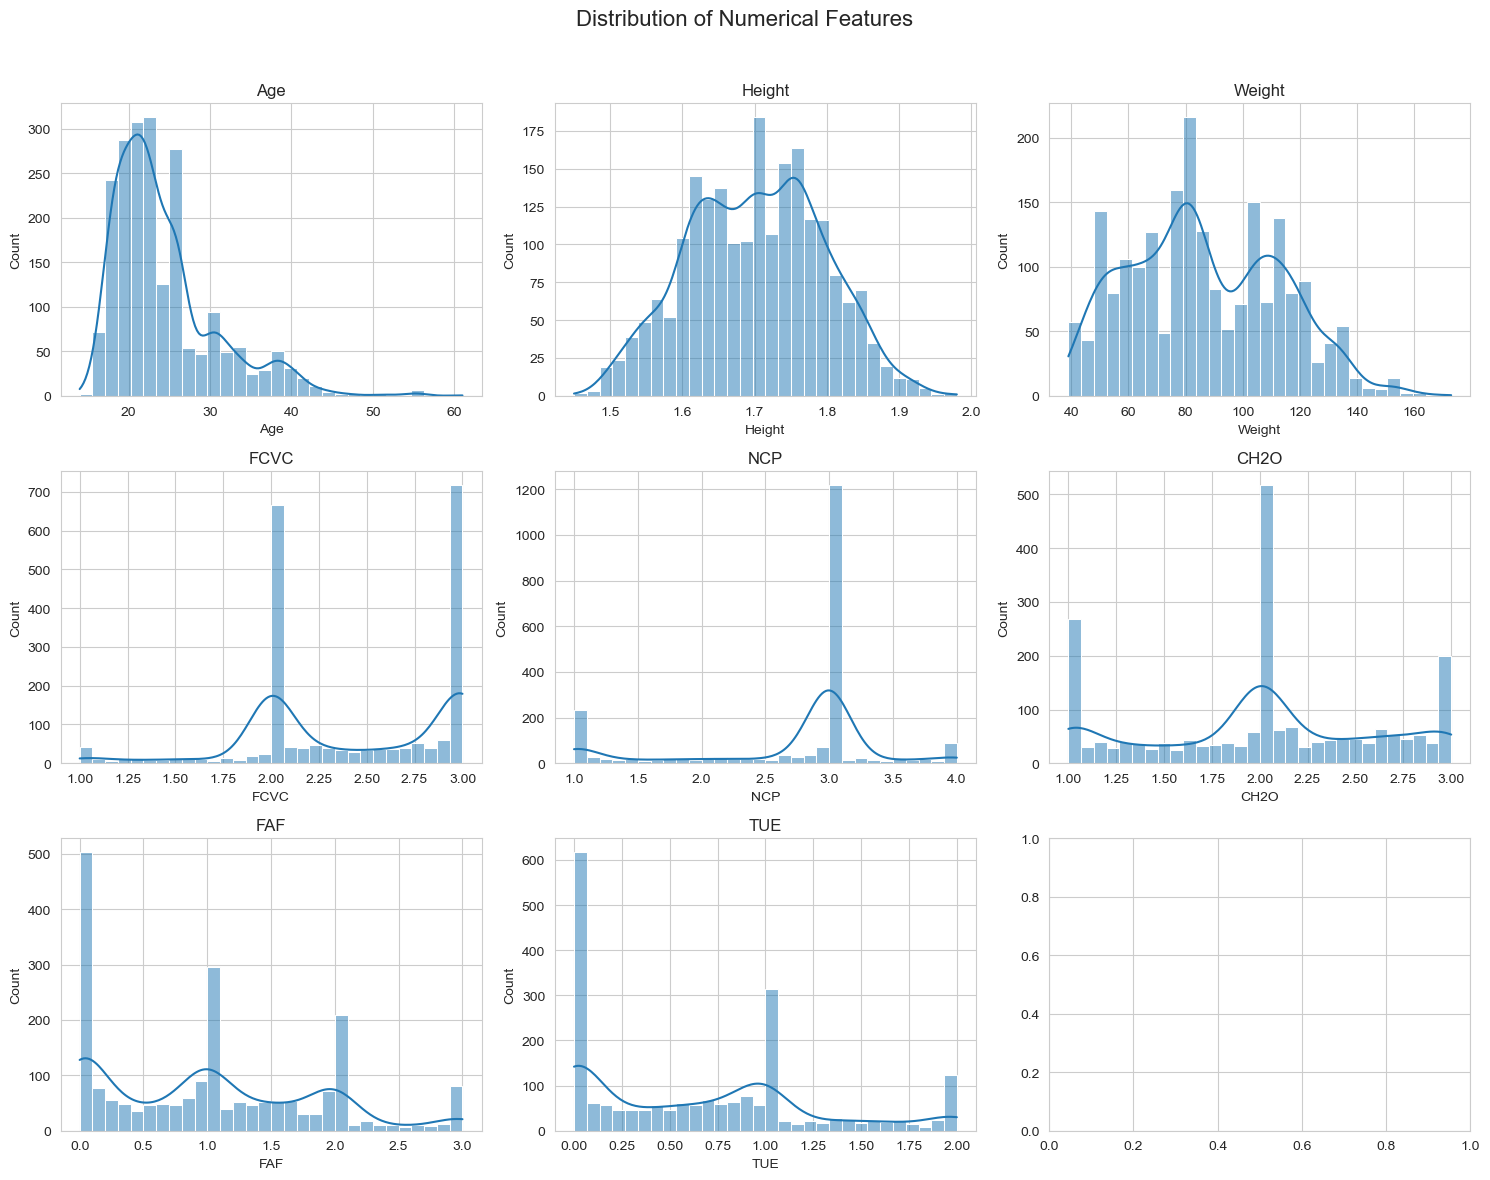

In [17]:
# EDA: Plot distributions of numerical features
sns.set_style("whitegrid")
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Distribution of Numerical Features", fontsize=16)
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

/var/folders/vd/mcv405n55252884d5sd8xwx80000gn/T/ipykernel_87234/2754027577.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["NObeyesdad"], order=df["NObeyesdad"].value_counts().index, palette="coolwarm")


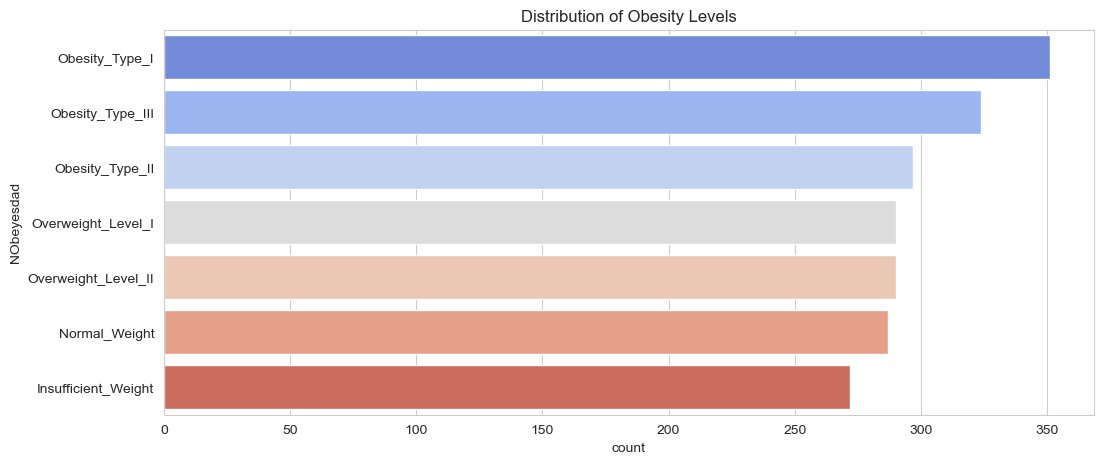

In [19]:
# Class distribution of target variable
plt.figure(figsize=(12, 5))
sns.countplot(y=df["NObeyesdad"], order=df["NObeyesdad"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Obesity Levels")
plt.show()

In [23]:
# Encode categorical variables
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
                    'SMOKE', 'SCC', 'CALC', 'MTRANS']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [25]:
# Drop the target variable as clustering is unsupervised
df_cluster = df.drop(columns=['NObeyesdad'])

In [27]:
# Standardize numerical features
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)
df_cluster_scaled = pd.DataFrame(df_cluster_scaled, columns=df_cluster.columns)

In [29]:
# Elbow Method to determine optimal K
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cluster_scaled)
    inertia.append(kmeans.inertia_)

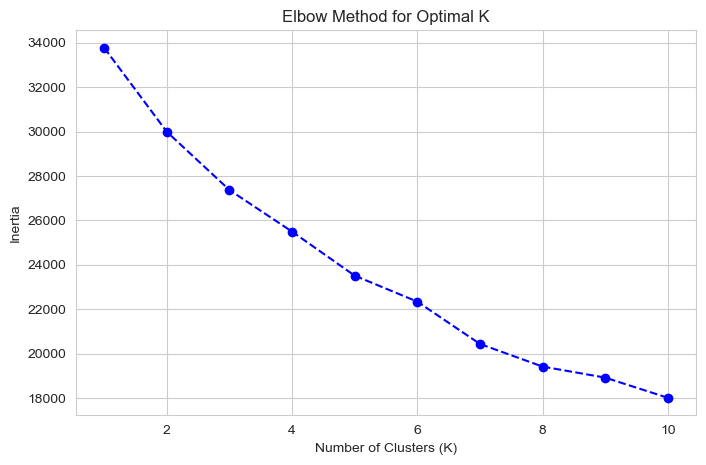

In [31]:
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [33]:
# Apply K-Means clustering with optimal K (e.g., K=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster_scaled["KMeans_Cluster"] = kmeans.fit_predict(df_cluster_scaled)

In [35]:
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
df_cluster_scaled["Agg_Cluster"] = agg_clustering.fit_predict(df_cluster_scaled)

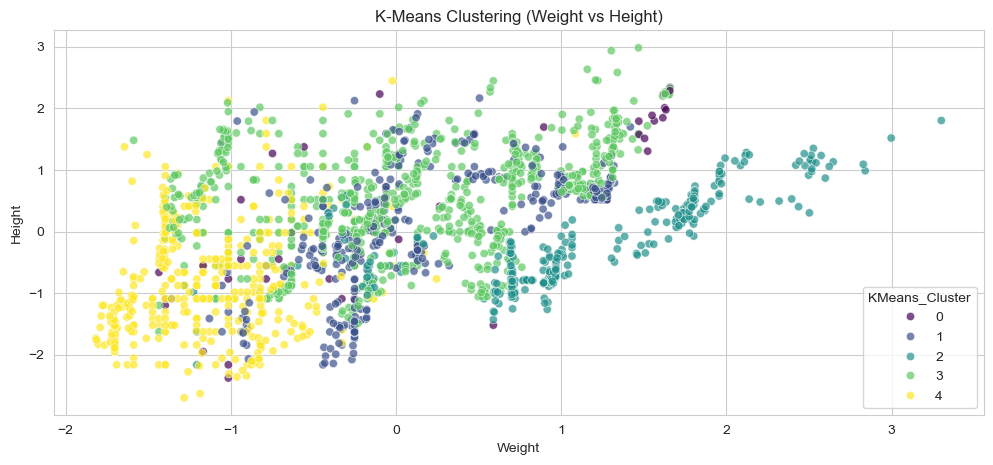

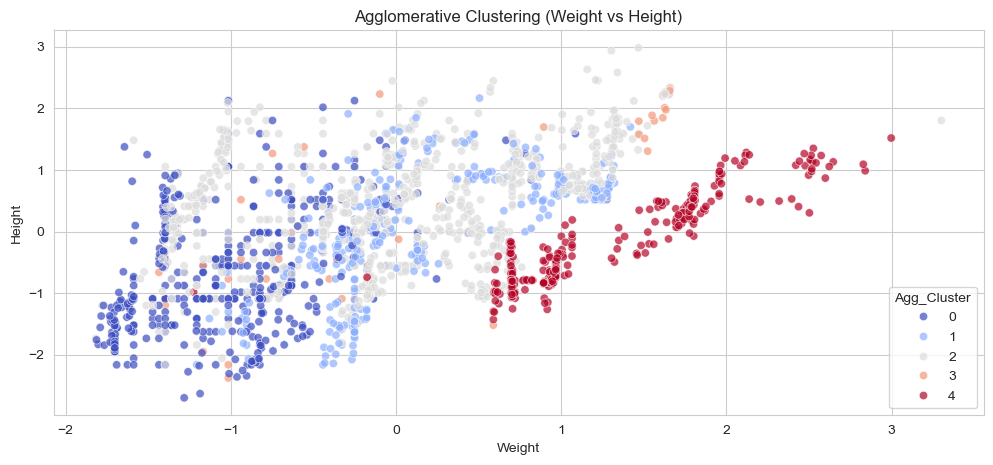

In [37]:
# Visualize Clustering Results
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df_cluster_scaled["Weight"], y=df_cluster_scaled["Height"], 
                hue=df_cluster_scaled["KMeans_Cluster"], palette="viridis", alpha=0.7)
plt.title("K-Means Clustering (Weight vs Height)")
plt.show()

plt.figure(figsize=(12, 5))
sns.scatterplot(x=df_cluster_scaled["Weight"], y=df_cluster_scaled["Height"], 
                hue=df_cluster_scaled["Agg_Cluster"], palette="coolwarm", alpha=0.7)
plt.title("Agglomerative Clustering (Weight vs Height)")
plt.show()


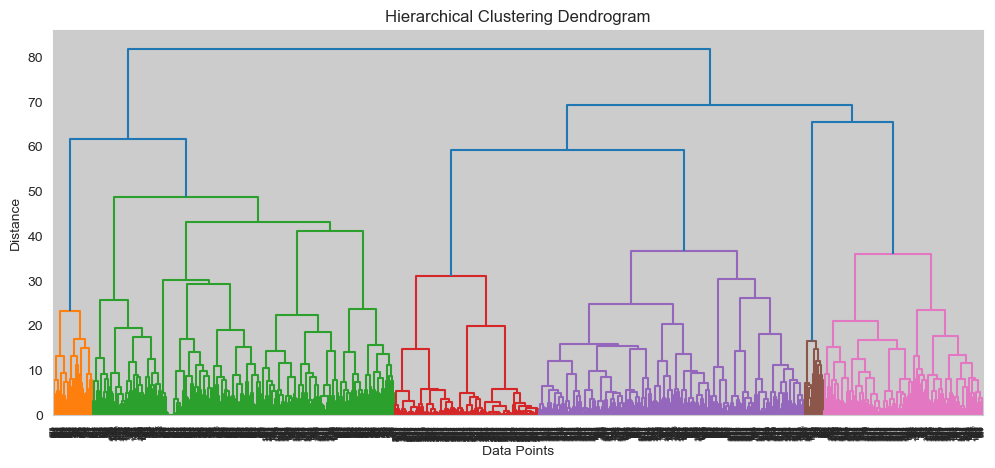

   KMeans_Cluster  Agg_Cluster
0               4            0
1               0            3
2               3            0
3               3            0
4               3            1


In [40]:
# Hierarchical Clustering Dendrogram
plt.figure(figsize=(12, 5))
Z = linkage(df_cluster_scaled.drop(columns=["KMeans_Cluster", "Agg_Cluster"]), method='ward')
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Display cluster assignments
print(df_cluster_scaled[["KMeans_Cluster", "Agg_Cluster"]].head())